In [ ]:
#!pip install tensorflow

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.9.0


In [8]:
observations = 1000

xs = np.random.uniform( low = -10, high = 10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs + 3*zs +5 + noise

In [10]:
np.savez('TF_introduction', inputs = generated_inputs, targets = generated_targets)

In [12]:
training_data = np.load('TF_introduction.npz')

In [21]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model.compile(optimizer = 'SGD', loss = 'mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 25.6637 - 218ms/epoch - 7ms/step
Epoch 2/100
32/32 - 0s - loss: 4.3607 - 61ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 1.4855 - 68ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6728 - 53ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4353 - 50ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3824 - 49ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3661 - 50ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3540 - 47ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3531 - 47ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3527 - 47ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3530 - 48ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3551 - 47ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3488 - 48ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3575 - 49ms/epoch - 2ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3583 - 49ms/epoch - 2ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3509 - 47ms/epoch - 1ms/step

In [23]:
model.layers[0].get_weights()

[array([[2.0045106],
        [3.0226007]], dtype=float32),
 array([5.005863], dtype=float32)]

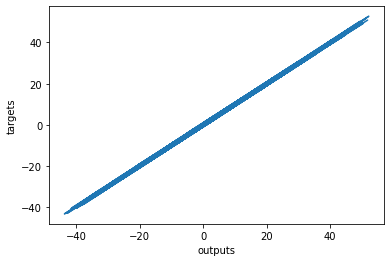

In [24]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()